In [2]:
import pandas as pd
import numpy as np

In [3]:
def External_indices_validation(predicted, labels, info_for_clusters=False):
    '''Clustering validation for unsupervised learning using external indices.
    Input:
        info_for_clustering: 
            True: Prints percentages of clusters containing each label
            False: Prints percentages of labels in each cluster
        
    Output:
       '''
    
    #####
    if not info_for_clusters:
        lst = []
        tmp = []
        for rating in sorted(labels.unique()):
            for ind, val in enumerate(labels):
                if val == rating:
                    tmp.append(predicted[ind])

            lst.append((rating, tmp))
            tmp = []


        #print statistics for each cluster
        for ind, sublist in lst:
            c = Counter(sublist)
            tmp = [(i, c[i] / len(sublist) * 100.0) for i, count in c.most_common()]
            print (f'Info for rating={ind} \n')
            for el in tmp:
                print(f'{el[1]:.2f} % in cluster {el[0]}')
            print ('\n')
    else:
        # create a list that on index i includes all the values of the labels under cluster #i
        lst = [[] for _ in range(len(np.unique(predicted)))]
        for ind, val in enumerate(predicted):
            lst[val].append(labels.values[ind])

        #print statistics for each cluster
        for ind,sublist in enumerate(lst):
            c = Counter(sublist)
            tmp = [(i, c[i] / len(sublist) * 100.0) for i, count in c.most_common()]
            print (f'Info for cluster #{ind} \n')
            for el in tmp:
                print(f'{el[1]:.2f} % of rating {el[0]}')
            print ('\n')

In [4]:
red = pd.read_csv('./csv_cache/red_clean.csv', delimiter='\t',index_col=0)
white = pd.read_csv('./csv_cache/white_clean.csv', delimiter='\t',index_col=0)

In [5]:
red_X = red.drop(labels='quality', axis=1)
red_y = red['quality']
white_X = white.drop(labels='quality', axis=1)
white_y = white['quality']

## Red wine clustering

In [7]:
from collections import Counter
from sklearn.cluster import KMeans,MeanShift,DBSCAN,AgglomerativeClustering
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(red_X, red_y, test_size=0.4, random_state=1)

In [8]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(X_train)
predicted = kmeans.predict(X_test)

External_indices_validation(predicted, y_test, info_for_clusters=False)


Info for rating=3 

100.00 % in cluster 2


Info for rating=4 

38.46 % in cluster 17
23.08 % in cluster 0
7.69 % in cluster 1
7.69 % in cluster 28
7.69 % in cluster 14
7.69 % in cluster 18
7.69 % in cluster 7


Info for rating=5 

7.35 % in cluster 13
6.37 % in cluster 0
5.88 % in cluster 11
5.39 % in cluster 10
4.90 % in cluster 5
4.90 % in cluster 27
4.90 % in cluster 7
4.41 % in cluster 14
4.41 % in cluster 6
3.92 % in cluster 18
3.92 % in cluster 28
3.92 % in cluster 2
3.92 % in cluster 20
3.43 % in cluster 24
3.43 % in cluster 1
3.43 % in cluster 17
3.43 % in cluster 23
2.94 % in cluster 26
2.94 % in cluster 29
2.45 % in cluster 3
1.96 % in cluster 15
1.96 % in cluster 16
1.96 % in cluster 25
1.47 % in cluster 8
1.47 % in cluster 22
1.47 % in cluster 9
1.47 % in cluster 21
0.98 % in cluster 4
0.98 % in cluster 12


Info for rating=6 

8.10 % in cluster 15
7.62 % in cluster 0
7.14 % in cluster 17
6.19 % in cluster 3
6.19 % in cluster 6
6.19 % in cluster 27
5.71 % in cluster 10
5.7

In [9]:
MeanS = MeanShift(n_jobs=-1)
MeanS.fit(X_train)
predictedMs = MeanS.predict(X_test)
External_indices_validation(predictedMs, y_test, info_for_clusters=True)

Info for cluster #0 

47.70 % of rating 6
36.49 % of rating 5
12.07 % of rating 7
2.87 % of rating 4
0.57 % of rating 8
0.29 % of rating 3


Info for cluster #1 

59.23 % of rating 5
33.85 % of rating 6
4.62 % of rating 7
2.31 % of rating 4




In [10]:
Dbs = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
predictedDbs = Dbs.fit_predict(X_test)

External_indices_validation(predictedDbs, y_test, info_for_clusters=True)

Info for cluster #0 

43.93 % of rating 6
42.68 % of rating 5
10.04 % of rating 7
2.72 % of rating 4
0.42 % of rating 8
0.21 % of rating 3




In [11]:
Agg = AgglomerativeClustering(n_clusters=30)
predictedAgg = Agg.fit_predict(X_test)

External_indices_validation(predictedAgg, y_test, info_for_clusters=False)

Info for rating=3 

100.00 % in cluster 16


Info for rating=4 

46.15 % in cluster 14
15.38 % in cluster 13
7.69 % in cluster 29
7.69 % in cluster 17
7.69 % in cluster 3
7.69 % in cluster 23
7.69 % in cluster 9


Info for rating=5 

8.33 % in cluster 13
8.33 % in cluster 2
6.86 % in cluster 7
6.37 % in cluster 3
5.88 % in cluster 0
4.41 % in cluster 6
4.41 % in cluster 12
3.92 % in cluster 14
3.92 % in cluster 27
3.43 % in cluster 5
3.43 % in cluster 21
3.43 % in cluster 1
3.43 % in cluster 28
3.43 % in cluster 9
2.94 % in cluster 15
2.94 % in cluster 22
2.94 % in cluster 16
2.45 % in cluster 10
2.45 % in cluster 4
2.45 % in cluster 17
1.96 % in cluster 23
1.96 % in cluster 8
1.96 % in cluster 29
1.96 % in cluster 24
1.47 % in cluster 11
1.47 % in cluster 26
1.47 % in cluster 20
0.98 % in cluster 19
0.98 % in cluster 18


Info for rating=6 

12.38 % in cluster 13
10.95 % in cluster 5
8.10 % in cluster 7
7.62 % in cluster 3
6.67 % in cluster 14
5.71 % in cluster 0
5.71 % in cluster 16


In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z=linkage(X_test)


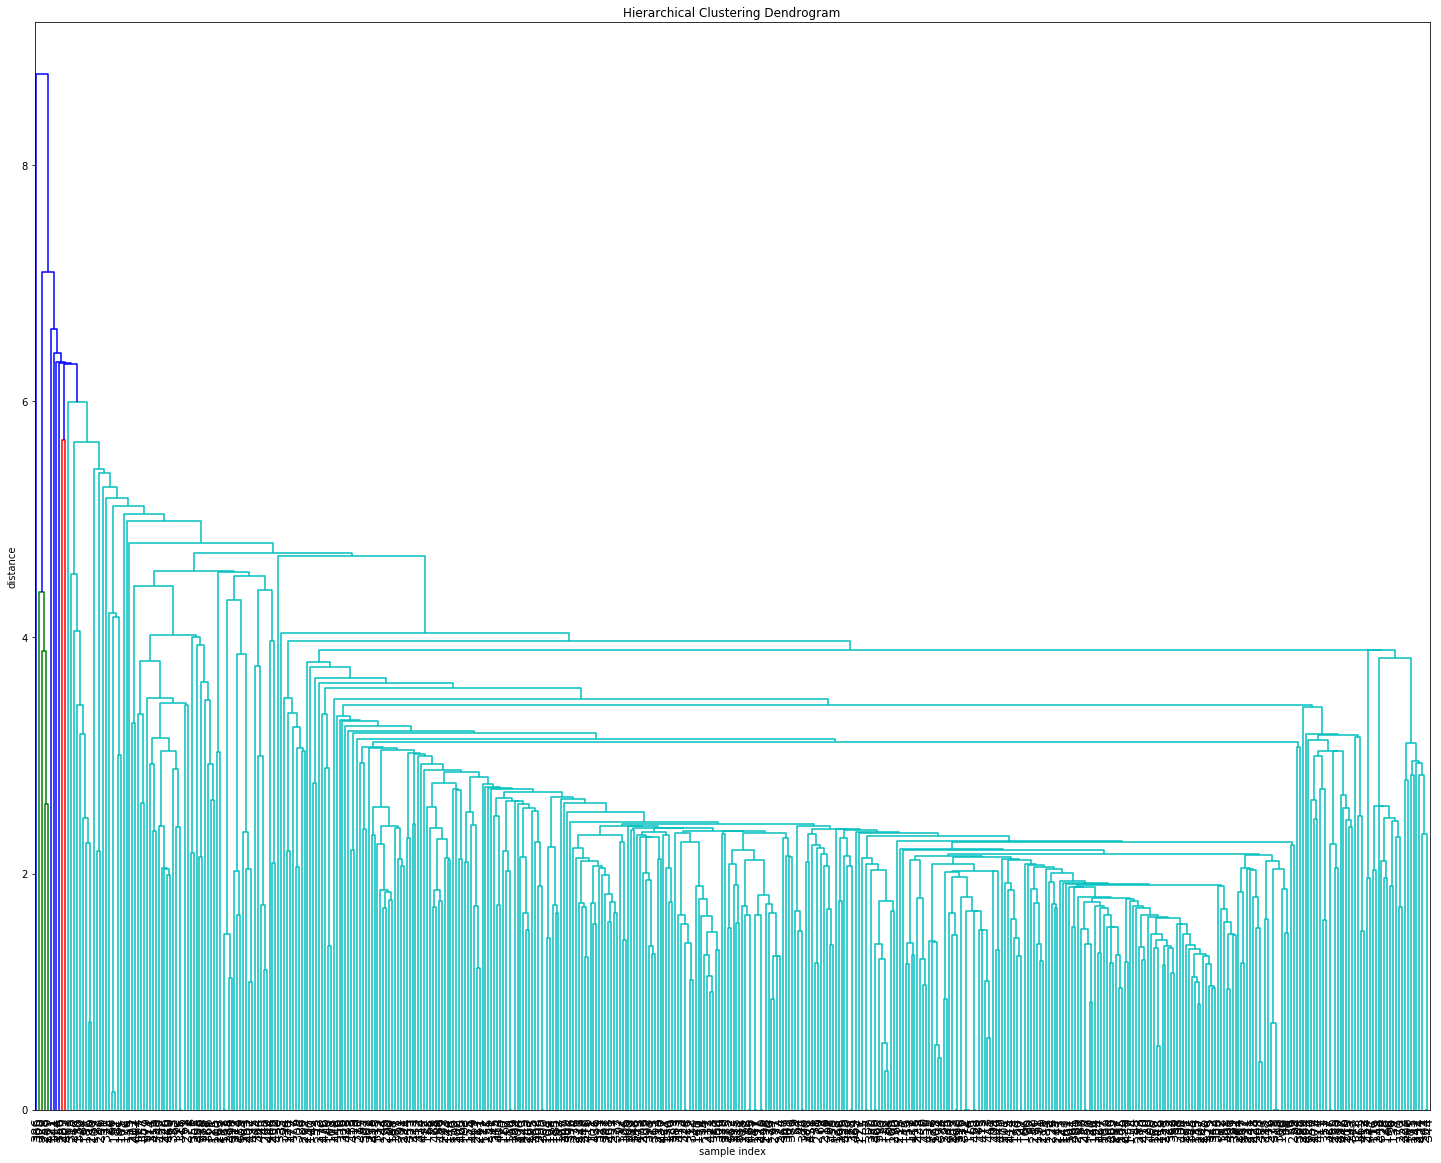

In [15]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=13.,  # font size for the x axis labels
)
plt.show()

## White wine clustering

In [16]:
from collections import Counter
from sklearn.cluster import KMeans,MeanShift,DBSCAN,AgglomerativeClustering
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(white_X, white_y, test_size=0.4, random_state=1)

In [17]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(X_train)
predicted = kmeans.predict(X_test)

External_indices_validation(predicted, y_test, info_for_clusters=False)


Info for rating=3 

33.33 % in cluster 3
33.33 % in cluster 14
33.33 % in cluster 11


Info for rating=4 

20.00 % in cluster 3
17.78 % in cluster 11
15.56 % in cluster 7
6.67 % in cluster 21
4.44 % in cluster 17
4.44 % in cluster 24
4.44 % in cluster 2
4.44 % in cluster 12
4.44 % in cluster 6
2.22 % in cluster 28
2.22 % in cluster 13
2.22 % in cluster 19
2.22 % in cluster 25
2.22 % in cluster 22
2.22 % in cluster 14
2.22 % in cluster 1
2.22 % in cluster 26


Info for rating=5 

6.70 % in cluster 2
6.70 % in cluster 19
6.00 % in cluster 20
6.00 % in cluster 11
6.00 % in cluster 3
5.54 % in cluster 8
4.62 % in cluster 28
4.39 % in cluster 13
4.39 % in cluster 25
4.39 % in cluster 1
4.39 % in cluster 17
3.70 % in cluster 22
3.23 % in cluster 9
3.23 % in cluster 0
3.23 % in cluster 15
3.00 % in cluster 14
2.77 % in cluster 23
2.54 % in cluster 24
2.31 % in cluster 4
2.31 % in cluster 7
2.08 % in cluster 16
2.08 % in cluster 18
1.85 % in cluster 27
1.85 % in cluster 6
1.62 % in cluster 12


In [18]:
MeanS = MeanShift(n_jobs=-1)
MeanS.fit(X_train)
predictedMs = MeanS.predict(X_test)
External_indices_validation(predictedMs, y_test, info_for_clusters=True)

Info for cluster #0 

45.98 % of rating 6
26.98 % of rating 5
20.81 % of rating 7
3.18 % of rating 8
2.80 % of rating 4
0.19 % of rating 3
0.06 % of rating 9




In [19]:
Dbs = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
predictedDbs = Dbs.fit_predict(X_test)

External_indices_validation(predictedDbs, y_test, info_for_clusters=True)

Info for cluster #0 

45.98 % of rating 6
26.98 % of rating 5
20.81 % of rating 7
3.18 % of rating 8
2.80 % of rating 4
0.19 % of rating 3
0.06 % of rating 9




In [20]:
Agg = AgglomerativeClustering(n_clusters=30)
predictedAgg = Agg.fit_predict(X_test)

External_indices_validation(predictedAgg, y_test, info_for_clusters=False)

Info for rating=3 

33.33 % in cluster 4
33.33 % in cluster 21
33.33 % in cluster 24


Info for rating=4 

17.78 % in cluster 4
15.56 % in cluster 24
13.33 % in cluster 21
8.89 % in cluster 7
6.67 % in cluster 2
6.67 % in cluster 1
6.67 % in cluster 13
4.44 % in cluster 23
2.22 % in cluster 20
2.22 % in cluster 18
2.22 % in cluster 8
2.22 % in cluster 29
2.22 % in cluster 25
2.22 % in cluster 12
2.22 % in cluster 9
2.22 % in cluster 22
2.22 % in cluster 19


Info for rating=5 

6.70 % in cluster 1
6.47 % in cluster 25
6.00 % in cluster 4
5.77 % in cluster 9
5.77 % in cluster 8
5.31 % in cluster 6
4.39 % in cluster 20
4.39 % in cluster 24
4.16 % in cluster 22
4.16 % in cluster 18
4.16 % in cluster 26
4.16 % in cluster 3
4.16 % in cluster 12
3.46 % in cluster 21
3.46 % in cluster 17
3.46 % in cluster 15
3.00 % in cluster 28
2.77 % in cluster 7
2.54 % in cluster 5
2.31 % in cluster 2
2.31 % in cluster 11
1.62 % in cluster 16
1.62 % in cluster 10
1.62 % in cluster 0
1.39 % in cluster 27
1.

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z=linkage(X_test)


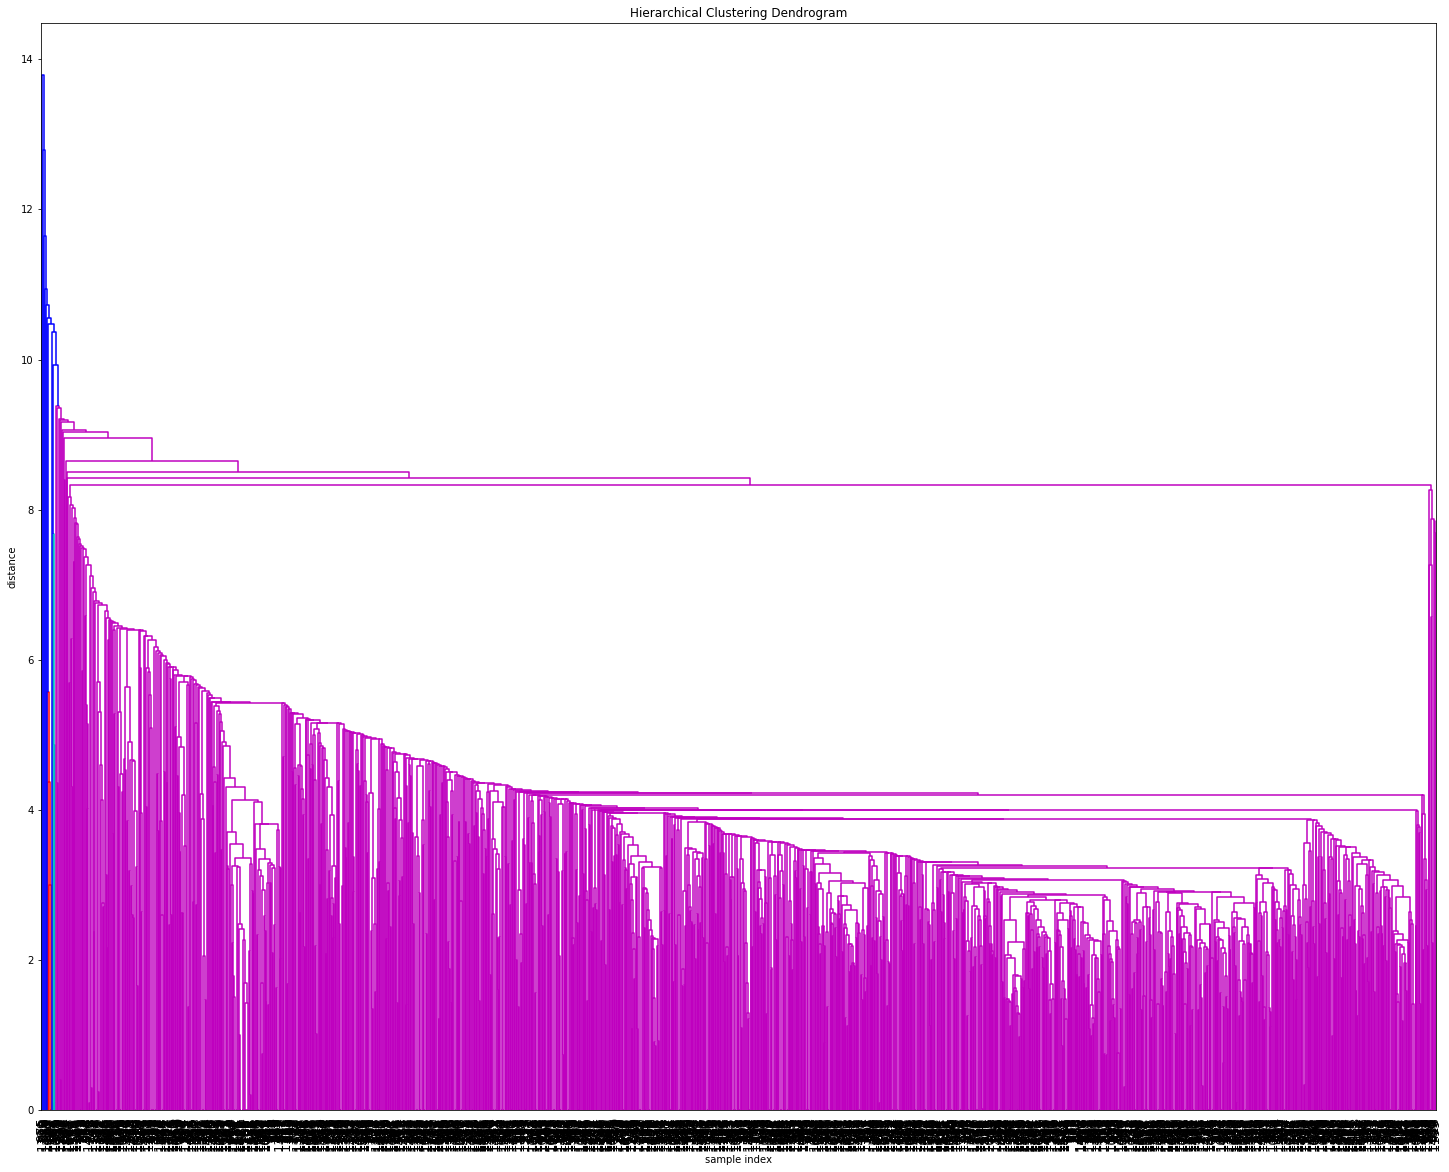

In [22]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=13.,  # font size for the x axis labels
)
plt.show()